<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/HomeworkSolutions/Solutions_BIOE3060Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 9 - SOLUTIONS

---

## <a name="HW1Inst">Instructions:</a>
---

1. <font color="tomato">Either click the COPY TO DRIVE button or use the menu File/Save/Save a Copy to save your own version of the notebook in your own folder in Google Drive.</font>

  - If you do not have a Google account, you will need to create a Google account in order to create your own individual copy of this notebook.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your drive.
  - Feel free to name and store the notebook wherever you like!

2. <font color="mediumseagreen">After you have copied the notebook into your Drive, you can begin editing and saving your work.</font>


**Upload your completed assignment into Canvas as a Google Colab (or Jupyter) Notebook with file extension `.ipynb`.**

**You must provide supporting work for your all of your answers.**



  - <font color="dodgerblue">That work will include using R code cells.</font>
    - **Feel free to insert as much R code as you like.**
    - You must interpret or explain how the output of a code cell is being utilized to solve the problem.
    - **Code with incomplete or missing explanations of why the output is useful may not receive full credit.**
  - <font color="dodgerblue">Your work will also involve writing explanations and justifications in text cells.</font>
    - **Be sure to type/write out the steps of your work/explanation so I can see how you arrived at your answer.**
  - <font color="dodgerblue">Your work in some parts  may involve doing algebra and/or calculus.</font>
    - Either type your work in the space below using LaTeX for mathematical equations.
      - Here's a helpful [Quick Reference Guide for LaTeX](https://colab.research.google.com/drive/1voDDmLfHmRWzWQW5yiHfqYsjGPFqdovP?usp=sharing).
      - Here's a helpful [LaTeX math symbol gallery](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols).
      - **Learning LaTeX is super useful and might even be enjoyable!**
    - Or you can write your work on paper/tablet, take a picture of your work, and then insert an image of your work.
    - Or you can Write your work on paper/tablet and submit to me separately when the assignment is due.
   

## Important Academic Policies:
---

- **Be your own work.** Though you may collaborate with others, everyone is responsible for writing up the work in their own way using their own methods. Plagiarism of any form is not tolerated.
- **Be complete.** You must provide all work and/or explanations needed to find the solution. Answers with insufficient or incomplete supporting work may lose credit.
- **Adhere to the Code of Academic Honesty.**
- **Be clearly written (and legible if written).** Your solution to a problem must be clear, written in complete sentences. You may lose credit for work that is unclear or hard to follow.

## <font color="dodgerblue">Let me know if you need help, and **GOOD LUCK!!!**</font>

----

# <a name="HW9q1">Question 1: </a>

---

Blood analysis was performed for 9 patients with aplastic anemia.  The data on % reticulocyte (or percentage of red blood cells) and density of lymphocytes is shown in Table 11.17.  

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/Anemia.png" width="300">


<br>




## <a name="HW9q1a">Question 1a</a>

---

Perform a linear regression of lymphocytes (y) on % reticulocyte (x) and report the coefficients.  Make a scatterplot of the data and overlay the regression line (include labels).



<br>



### Solution to Question 1a

---

<br>

Answer with the code cell below.

<br>



In [1]:
# First you will need to load the dataset
anemia <- read.csv("https://raw.githubusercontent.com/gibsonea/Biostats/main/Datasets/anemia.csv")
str(anemia) #displays the variable names and types

'data.frame':	9 obs. of  3 variables:
 $ Patient.ID   : int  1 2 3 4 5 6 7 8 9
 $ Reticulocytes: num  3.6 2 0.3 0.3 0.2 3 0 1 2.2
 $ Lymphocytes  : int  1700 3078 1820 2706 2086 2299 676 2088 2013


In [4]:
# Code for Question 1a
x <- anemia$Reticulocytes
y <- anemia$Lymphocytes

x.mean = mean(x)
y.mean = mean(y)

Lxx = sum((x-x.mean)^2)
Lxy = sum((x-x.mean)*(y-y.mean))

b = Lxy/Lxx
b
a = y.mean - b*x.mean
a



[1] 112.114

[1] 1894.818

In [3]:
#double check

lsfit(x,y)$coefficients

Intercept         X 
 1894.818   112.114

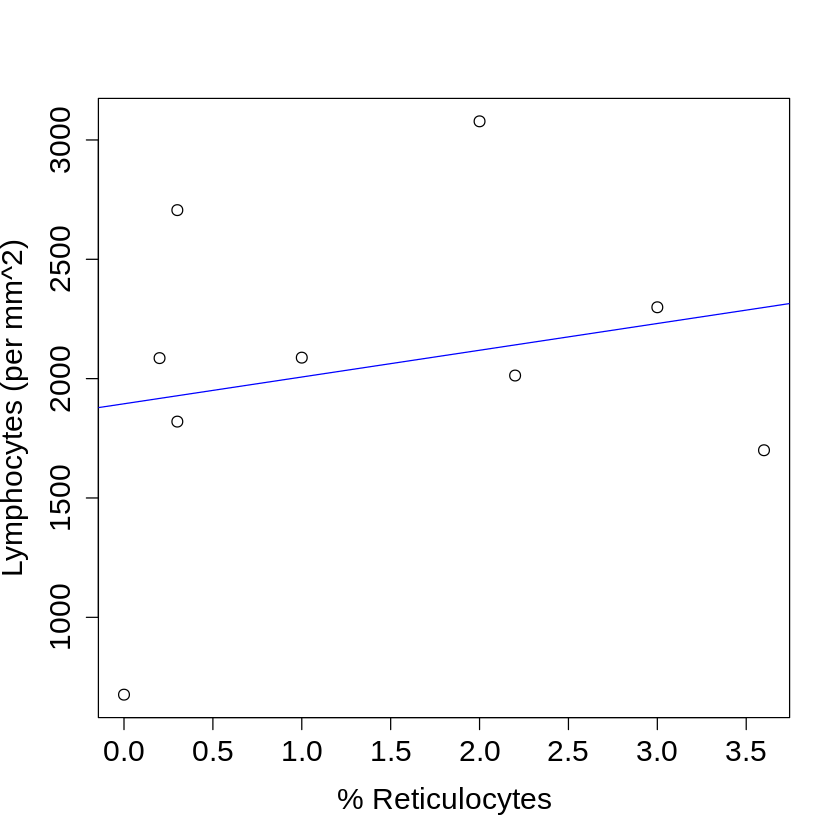

In [6]:
plot(x,y,xlab = '% Reticulocytes', ylab = 'Lymphocytes (per mm^2)' ,
cex = 1.2, cex.lab=1.5, cex.axis=1.5)
abline(a,b, col = "blue") # adds a line on the plot

## <a name="HW9q1b">Question 1b</a>

---

Is there a dependence between the variables?  Write down the hypotheses you will test and describe in a few sentences.  

<br>


### Solution to Question 1b

---
<br>

$H_0$: $\beta = 0$

$H_1$: $\beta \neq 0$

The null hypothesis states that there is no dependence of Lymphocytes on % Recticulocytes, the slope is zero.  The alternative hypothesis states that these is a dependences, the slope is not zero.


<br>  


## <a name="HW9q1c">Question 1c</a>

---

Use an F test for linear regression and solve for the p-value.  What do you conclude from your test?  

<br>


### Solution to Question 1c

---


The standardized test statistic is F = RegMS/MSE = 0.368

The p-value is 0.563

We accept the null hypothesis and conclude that there is no dependence of Lymphocytes density on % Recticulocytes.


<br>  
<br>  
<br>  


In [10]:
#code for calculations

y_hat = a+b*x
y.mean = mean(y)
x.mean = mean(x)

k = 1
n = length(y)
RegMS = sum((y_hat - y.mean)^2)/k
MSE = sum((y - y_hat)^2)/(n-k-1)

F = RegMS/MSE
F

1-pf(F,k,n-k-1)

[1] 0.3682632

[1] 0.5631094

## <a name="HW9q1d">Question 1d</a>

---

What is the $R^2$ value for your linear regression?

Note that $R^2 = \frac{RegressionSS}{TotalSS}$

<br>


### Solution to Question 1d

---

The R-squared value is 0.05, which indicates that most of the variance in y does not depend on x.

<br>  


In [12]:
#code cell for calculations

R_sq = sum((y_hat - y.mean)^2)/sum((y-y.mean)^2)
R_sq

[1] 0.04997965

## <a name="HW9q1e">Question 1e</a>

---

What is the standard error for the slope of the regression line?


<br>


### Solution to Question 1e

---


The estimate of the slope of the regression line is b = 112.11 with a standard error of se(b) = 184.75.

<br>  


In [14]:
# code cell for calculating

se.b = sqrt(MSE/Lxx)
se.b

[1] 184.7485

# <a name="HW8q2">Question 2:  </a>

---

Transient hypothyroxinemia, a common finding in premature infants, is not thought to have long-term consequences or to require treatment. A study was performed to investigate whether hypothyroxinemia in premature infants is a cause of subsequent motor and cognitive abnormalities. Blood thyroxine values were obtained on routine screening in the first week of life from 536 infants who weighed 2000 g or less at birth and were born at 33 weeks gestation or earlier. The data in Table 11.21 were presented concerning the relationship between mean thyroxine level and gestational age.

<br>
<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/Thyroxine.png" width="300">




In [15]:
#load in dataset
infant <- read.csv("https://raw.githubusercontent.com/gibsonea/Biostats/main/Datasets/Infant.csv")
str(infant)

'data.frame':	10 obs. of  2 variables:
 $ Gestational.Age: int  24 25 26 27 28 29 30 31 32 33
 $ Thyroxine.Level: num  6.5 7.1 7 7.1 7.2 7.1 8.1 8.7 9.5 10.1


## <a name="HW9q2a">Question 2a</a>

---

What is the best-fitting regression line relating mean thyroxine level to gestational age?  Make a scatterplot of the data and overlay the regression line (include labels).


### Solution to Question 2a

---

Use code cell


<br>  
<br>  





In [16]:
# code cell for Question 2a

# Code for Question 1a
x <- infant$Gestational.Age
y <- infant$Thyroxine.Level

x.mean = mean(x)
y.mean = mean(y)

Lxx = sum((x-x.mean)^2)
Lxy = sum((x-x.mean)*(y-y.mean))

b = Lxy/Lxx
b
a = y.mean - b*x.mean
a

[1] 0.3672727

[1] -2.627273

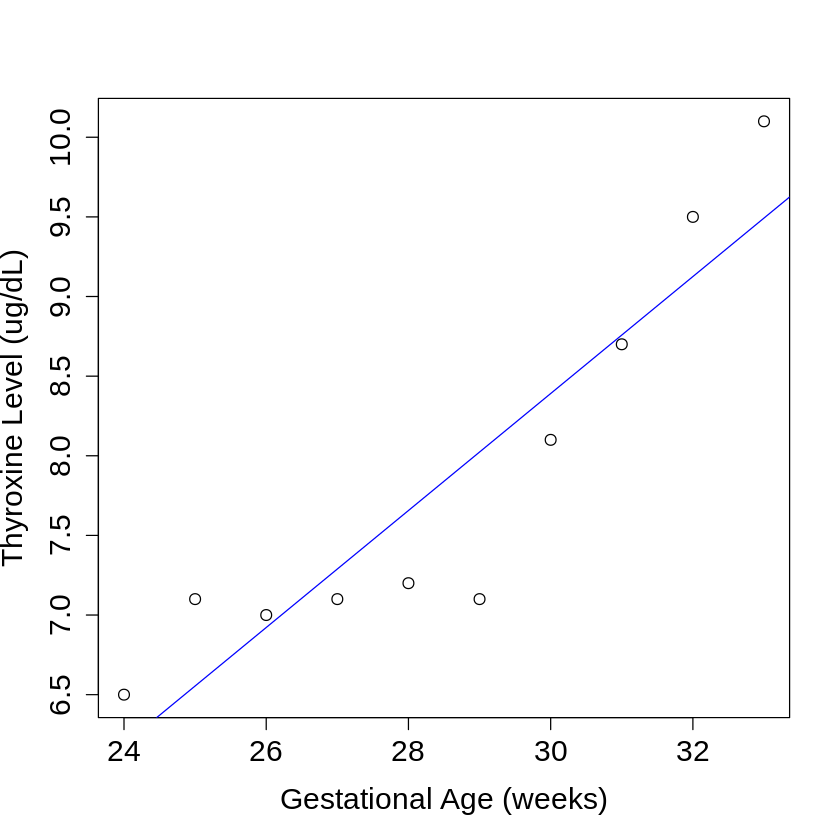

In [17]:

plot(x,y,xlab = 'Gestational Age (weeks)', ylab = 'Thyroxine Level (ug/dL)' ,
cex = 1.2, cex.lab=1.5, cex.axis=1.5)
abline(a,b, col = "blue") # adds a line on the plot

## <a name="HW9q2b">Question 2b</a>

---

Is there a significant association between mean thyroxine level and gestational age? Perform the appropriate hypothesis test and report a p-value.

### Solution to Question 2b

---

<br>
$H_0: \beta = 0$

$H_1: \beta \neq 0$

Performing a regression F test, we find that the standardized test statistic is F = 42.48

The p-value is p = 0.000184

We conclude that there is a significant dependence of thyroxine level on gestational age.




In [18]:
# Code cell for calculations

y_hat = a+b*x
y.mean = mean(y)
x.mean = mean(x)

k = 1
n = length(y)
RegMS = sum((y_hat - y.mean)^2)/k
MSE = sum((y - y_hat)^2)/(n-k-1)

F = RegMS/MSE
F

1-pf(F,k,n-k-1)


[1] 42.48204

[1] 0.0001846068

## <a name="HW9q2c">Question 2c</a>

---

Show a plot of the residual values overlaid with a line at y = 0.  Do you think that the data fits a linear model?



### Solution to Question 2c

---


The residuals show a non-linear dependence, and follow a curve instead of being uniform about 0 for all x.  It might be better to also include higher order terms such as $x^2$, $x^3$, in the model.
<br>
<br>







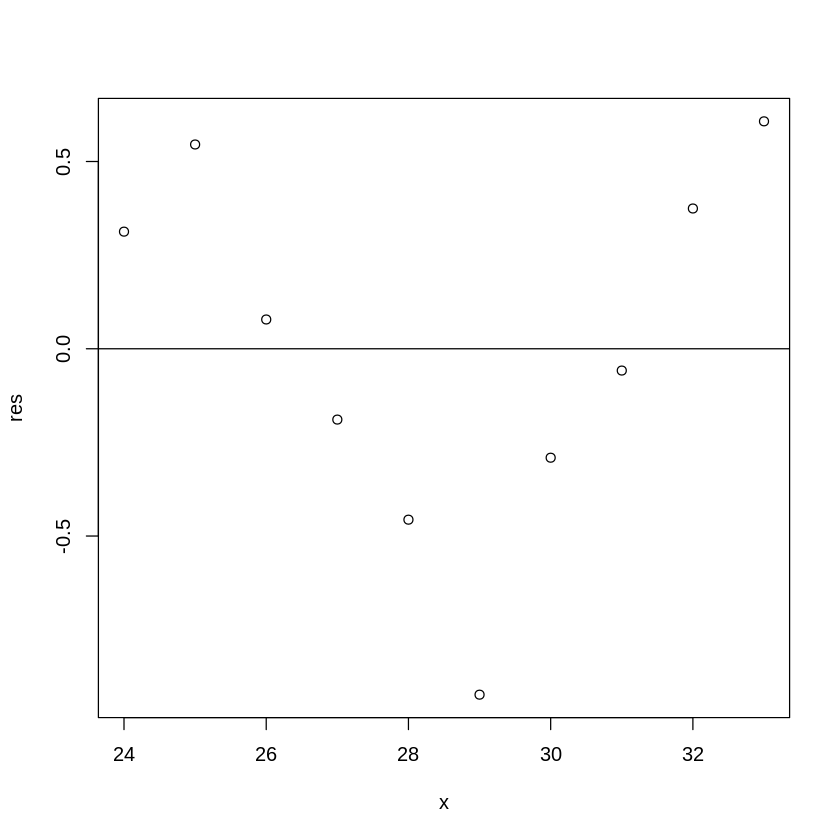

In [19]:
# code cell for Question 2c

#find the residuals
y_hat = a+b*x
res = y-y_hat

plot(x,res)
abline(0,0)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9236 -0.2655  0.0100  0.3591  0.6073 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.62727    1.61408  -1.628 0.142235    
x            0.36727    0.05635   6.518 0.000185 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5118 on 8 degrees of freedom
Multiple R-squared:  0.8415,	Adjusted R-squared:  0.8217 
F-statistic: 42.48 on 1 and 8 DF,  p-value: 0.0001846



Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49030 -0.03780  0.04212  0.15239  0.32879 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 40.92273    9.81590   4.169  0.00419 **
x           -2.72023    0.69378  -3.921  0.00574 **
I(x^2)       0.05417    0.01216   4.455  0.00295 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2794 on 7 degrees of freedom
Multiple R-squared:  0.9587,	Adjusted R-squared:  0.9469 
F-statistic:  81.2 on 2 and 7 DF,  p-value: 1.435e-05


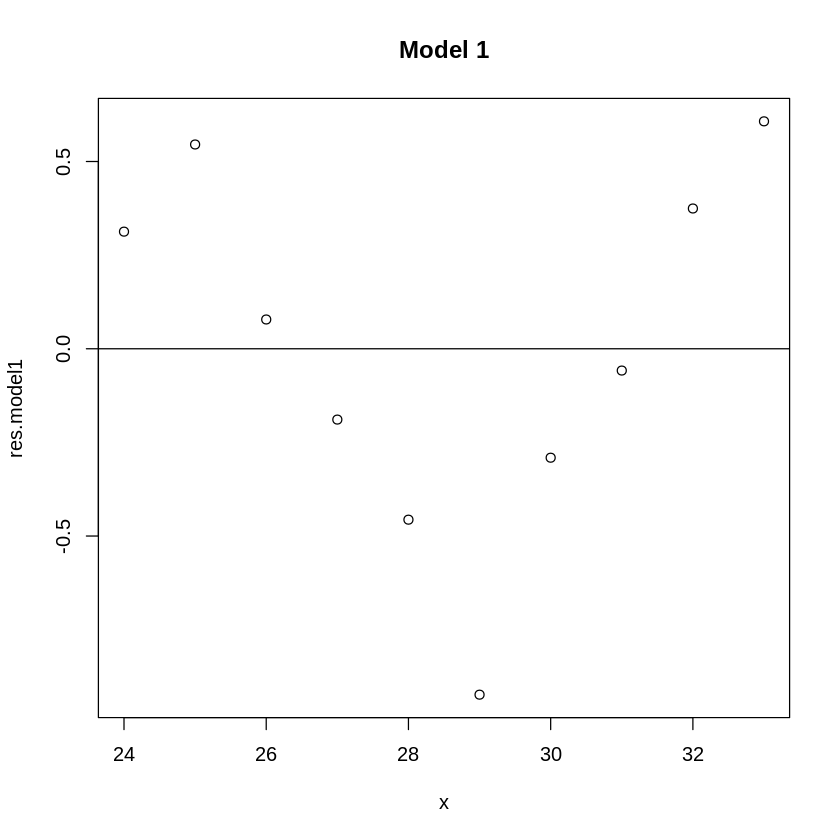

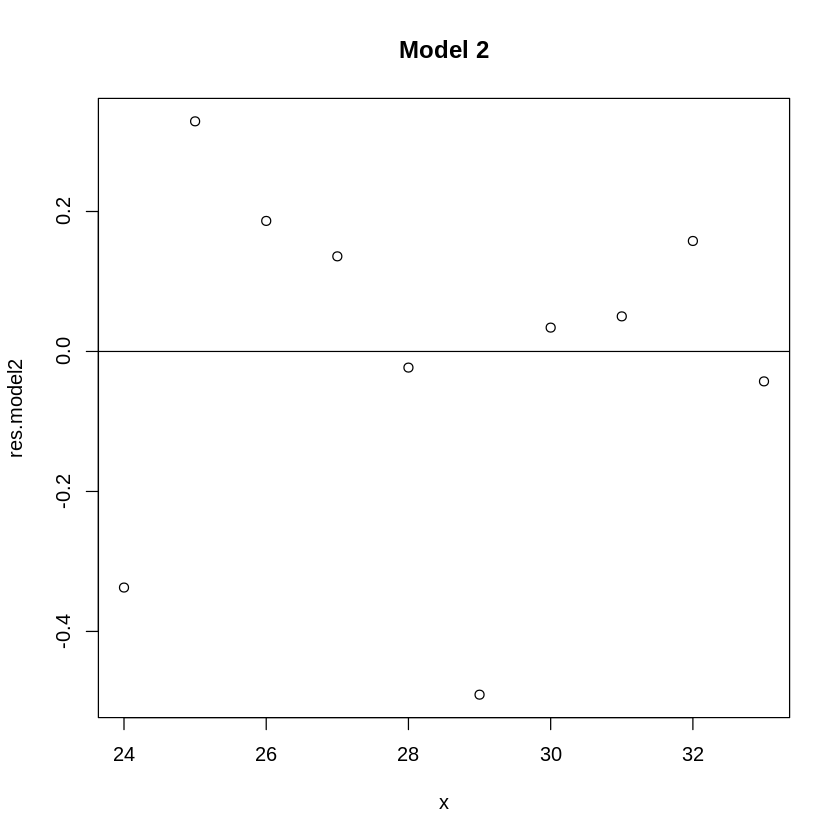

In [28]:
# using multiple linear regression, we can include x squared in our model

# Model with x only

model1 <- lm(y ~ x )

# Model with x and x^2
model2 <- lm(y ~ x + I(x^2))

# Print the model summary
summary(model1)
summary(model2)

# look at the residuals for model2

res.model1 = resid(model1)
res.model2 = resid(model2)

plot(x, res.model1,main="Model 1")
abline(0, 0)

plot(x, res.model2,main="Model 2")
abline(0, 0)

# The residuals for model 2 are better and p value shows more statistical significance.


# <a name="HW9q3">Question 3: </a>

---

Forced expiratory volume (FEV) is an index of pulmonary function that measures the volume of air expelled after 1 second of constant effort.  The dataset FEV which contains determinations of FEV in 1980 on 654 children ages 3 through 19 who were seen in the Childhood Respiratory Disease (CRD) Study in East Boston, Massachusetts. These data are part of a longitudinal study to follow the change in pulmonary function over time in children.


<br>
<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/FEVdatatableinfo.png" width="300">



In [29]:
#load in dataset
FEV <- read.csv("https://raw.githubusercontent.com/gibsonea/Biostats/main/Datasets/FEV.csv")
str(FEV)

'data.frame':	654 obs. of  6 variables:
 $ Id   : int  301 451 501 642 901 1701 1752 1753 1901 1951 ...
 $ Age  : int  9 8 7 9 9 8 6 6 8 9 ...
 $ FEV  : num  1.71 1.72 1.72 1.56 1.9 ...
 $ Hgt  : num  57 67.5 54.5 53 57 61 58 56 58.5 60 ...
 $ Sex  : int  0 0 0 1 1 0 0 0 0 0 ...
 $ Smoke: int  0 0 0 0 0 0 0 0 0 0 ...


## <a name="HW9q3a">Question 3a</a>

---

We want to look at the dependence of FEV on age.  Perform a linear regression of FEV on age.  Do the regression separately for boys and girls.  Make two plots of the two groups of data and overlay the regression lines (include labels).

### Solution to Question 3a

---


<br>
<br>



In [36]:
#code cell for Question 3a
FEV.girls = subset(FEV,Sex==0)
FEV.boys = subset(FEV,Sex==1)

x = FEV.girls$Age
y = FEV.girls$FEV

x2 = FEV.boys$Age
y2 = FEV.boys$FEV


#Girls

x.mean = mean(x)
y.mean = mean(y)

Lxx = sum((x-x.mean)^2)
Lxy = sum((x-x.mean)*(y-y.mean))

b = Lxy/Lxx
b
a = y.mean - b*x.mean
a

#Boys

x2.mean = mean(x2)
y2.mean = mean(y2)

Lxx2 = sum((x2-x2.mean)^2)
Lxy2 = sum((x2-x2.mean)*(y2-y2.mean))

b2 = Lxy2/Lxx2
b2
a2 = y2.mean - b2*x2.mean
a2



[1] 0.1627289

[1] 0.8494671

[1] 0.2734776

[1] 0.07360056

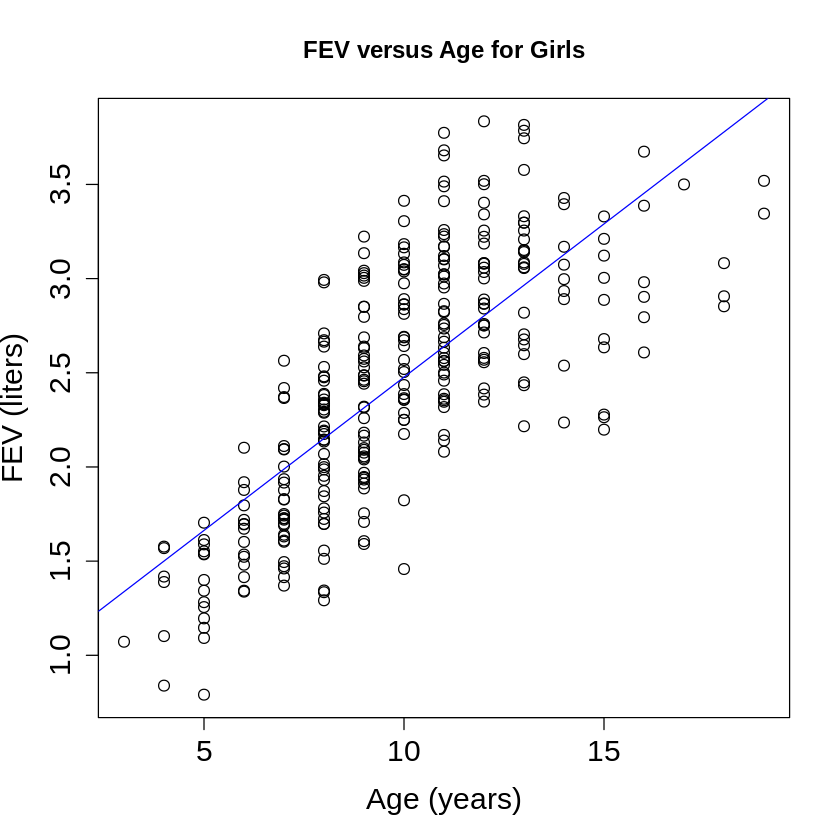

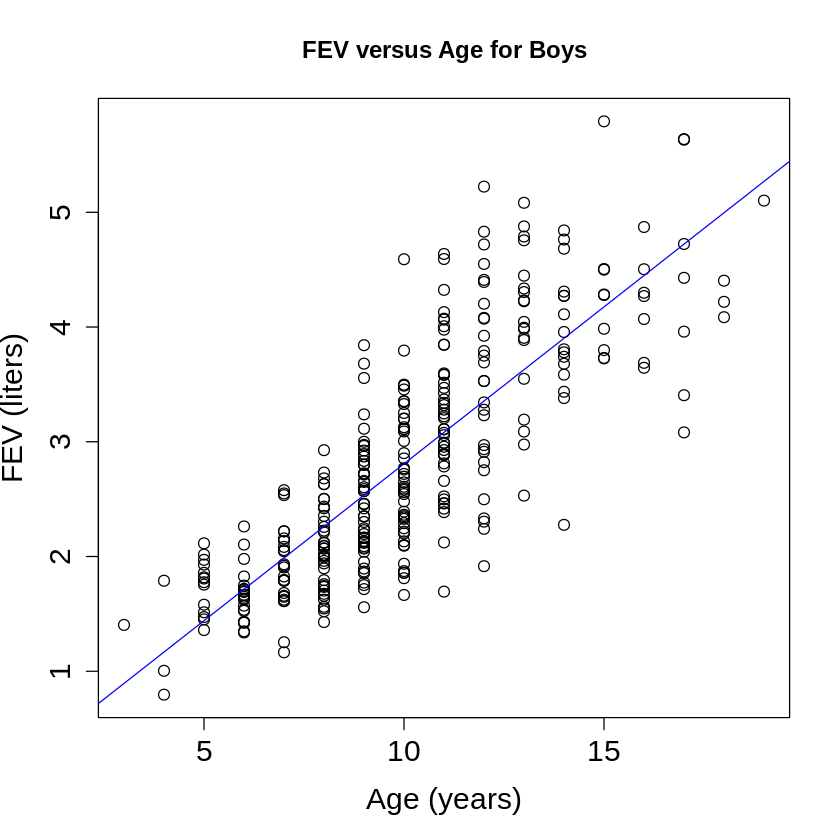

In [37]:
#plots
plot(x,y,xlab = 'Age (years)', ylab = 'FEV (liters)' ,main = 'FEV versus Age for Girls',
cex = 1.2, cex.lab=1.5, cex.axis=1.5)
abline(a,b, col = "blue") # adds a line on the plot

plot(x2,y2,xlab = 'Age (years)', ylab = 'FEV (liters)' ,main = 'FEV versus Age for Boys',
cex = 1.2, cex.lab=1.5, cex.axis=1.5)
abline(a2,b2, col = "blue") # adds a line on the plot

## <a name="HW8q3b">Question 3b</a>

---

What is the predicted FEV for a 13 year old boy?

### Solution to Question 3b

---

3.63 Liters
<br>



In [40]:
# code cell for Question 3b

pred = a2+b2*13
pred

[1] 3.62881

## <a name="HW9q3c">Question 3c</a>

---

What is the 95% confidence interval for your estimate in question 3b?

### Solution to Question 3c

---


MOE = 1.159

The 95% CI is (2.47,4.79).



In [41]:
#code cell for Question 3c

y2.hat = a2+b2*x2
n = length(y2)
k = 1

MSE2 = sum((y2-y2.hat)^2)/(n-k-1)

se_pred = sqrt(MSE2*(1/n+sum((x2-x2.mean)^2)/Lxx2))
se_pred

MOE_pred = qt(0.975,n-k-1)*se_pred

MOE_pred
pred + MOE_pred
pred - MOE_pred

[1] 0.5889761

[1] 1.15857

[1] 4.78738

[1] 2.47024

Not part of the Homework, but as an aside, here is a way to plot the 95% confidence interval for all values on the regression line.


Call:
lm(formula = y2 ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64072 -0.37752 -0.05318  0.36893  1.86867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0736     0.1128   0.653    0.514    
x2            0.2735     0.0108  25.329   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5881 on 334 degrees of freedom
Multiple R-squared:  0.6576,	Adjusted R-squared:  0.6566 
F-statistic: 641.6 on 1 and 334 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,3.62881,3.539353,3.718267


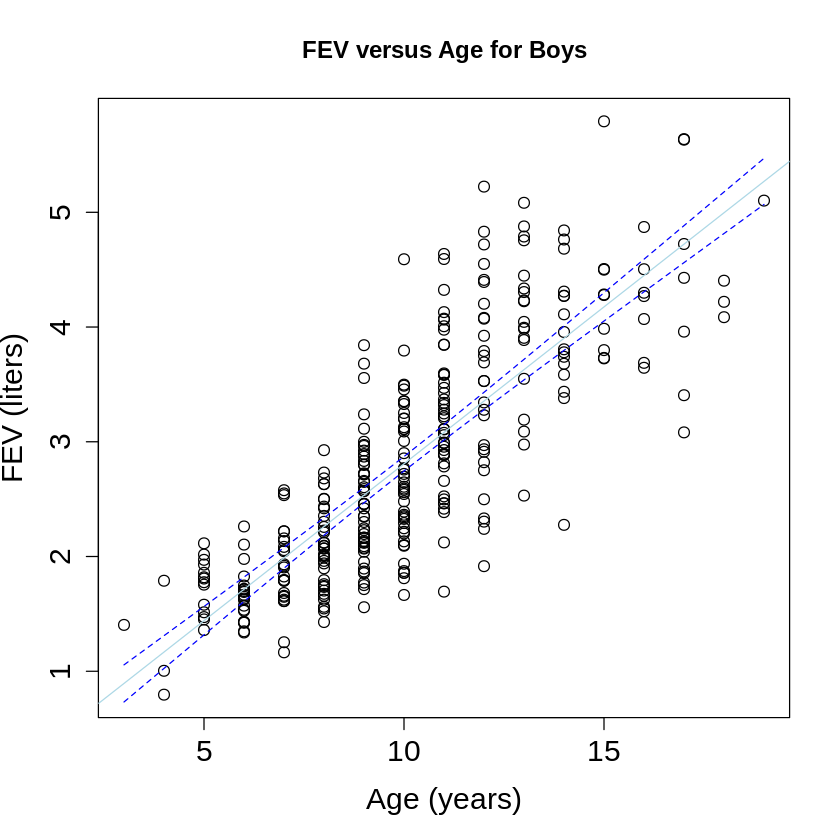

In [55]:
lmFEVboys = lm(y2 ~ x2)
summary(lmFEVboys)

newx = sort(unique(x2)) # creates an array that only includes unique values of x2 to calculate the prediction CI values
conf_interval <- predict(lmFEVboys, newdata=data.frame(x2=newx), interval="confidence",
                         level = 0.95)

predict(lmFEVboys, newdata=data.frame(x2=13), interval="confidence", level = 0.95)

plot(x2,y2,xlab = 'Age (years)', ylab = 'FEV (liters)' ,main = 'FEV versus Age for Boys',
cex = 1.2, cex.lab=1.5, cex.axis=1.5)
#abline(a2,b2, col = "blue") # adds a line on the plot
abline(lmFEVboys, col="lightblue")
matlines(newx, conf_interval[,2:3], col = "blue", lty=2)

